In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Dataset

In [4]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.shape

(891, 12)

In [8]:
test.shape

(418, 11)

## EDA

## Checking and working for missing value

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

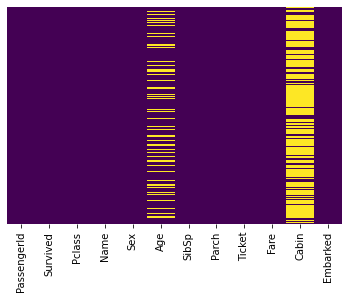

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Yellow lines shows missing values .As we can see here maximum of the data from the Cabin column are missing here so we can delete that column.We will fill Age column

<AxesSubplot:xlabel='Survived', ylabel='count'>

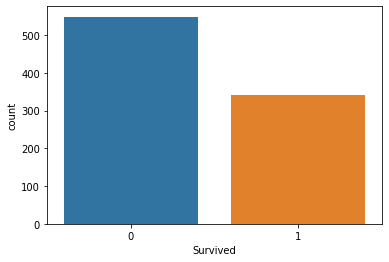

In [11]:
sns.countplot(x='Survived',data=train)

#### 0-not survived
#### 1-survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

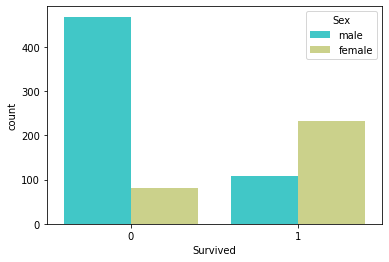

In [12]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

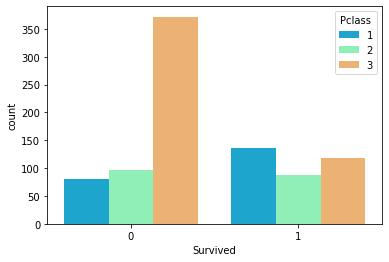

In [13]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

#### check the average age by passenger class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

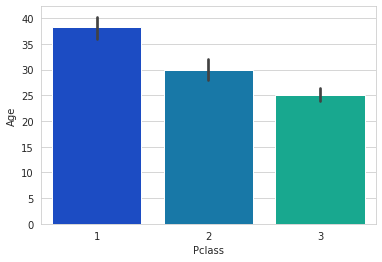

In [15]:
sns.set_style('whitegrid')
sns.barplot(x='Pclass',y='Age',data=train,palette='winter')

<AxesSubplot:>

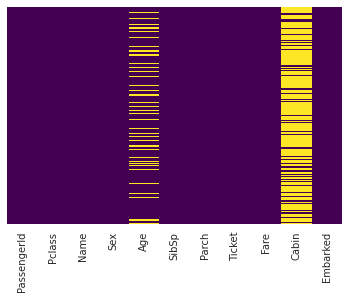

In [16]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### we will drop cabin and impute age column be average wrt Pclass for train and test data

In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age

In [20]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [21]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

#### Embarked column is also having 2 Nan values in train data ,we will delete this two rows

In [22]:
train.dropna(inplace=True)

In [23]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### in test data Fare column is having 1 Nan value ,we will impute this value with mean

In [26]:
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

### Converting categorical into numerical

In [32]:
train.drop(['Name', 'Ticket'], axis = 1,inplace=True)

In [33]:
test.drop(['Name', 'Ticket'], axis = 1,inplace=True)

In [34]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


In [37]:
train = pd.get_dummies(data=train,columns=['Sex','Embarked'],drop_first=True)

In [38]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0


In [39]:
test = pd.get_dummies(data=test,columns=['Sex','Embarked'],drop_first=True)

In [40]:
test.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1


#### Now our train and test data are ready to use

In [49]:
women = train.loc[train.Sex_male == 0]["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7403846153846154


In [50]:
men = train.loc[train.Sex_male == 1]["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


### Features and Labels

In [59]:
y=train['Survived']
X=train.drop(['Survived','PassengerId'],axis=1)

In [60]:
X_test_Final=test.drop(['PassengerId'],axis=1)

### Train-test-Split

In [65]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Model

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [106]:
y_pred = model_rf.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8352059925093633
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       164
           1       0.85      0.70      0.77       103

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267

[[151  13]
 [ 31  72]]


In [108]:
predictions = model_rf.predict(X_test_Final)

In [109]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
